# Load Dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention

Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
License(s): CC0-1.0
100% 87.2k/87.2k [00:00<00:00, 546kB/s]
100% 87.2k/87.2k [00:00<00:00, 545kB/s]


In [ ]:
!unzip higher-education-predictors-of-student-retention.zip

Archive:  higher-education-predictors-of-student-retention.zip
  inflating: dataset.csv             


# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Decision Tree

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [5]:
X = df.drop(columns=['Target'])
y = df['Target']

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

In [8]:
print(X_train.shape, X_test.shape)

(3096, 34) (1328, 34)


In [9]:
from collections import Counter

# Print class distribution in training set
print("Training set class distribution:")
print(Counter(y_train))

# Print class distribution in testing set
print("\nTesting set class distribution:")
print(Counter(y_test))

Training set class distribution:
Counter({2: 1546, 0: 994, 1: 556})

Testing set class distribution:
Counter({2: 663, 0: 427, 1: 238})


In [10]:
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
y_train_pred = model.predict(X_train)

In [13]:
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))

Train Accuracy:  1.0


In [14]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00       994
    Enrolled       1.00      1.00      1.00       556
    Graduate       1.00      1.00      1.00      1546

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096



In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  0.6656626506024096


In [17]:
print("\nTest Data Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Data Classification Report:
               precision    recall  f1-score   support

     Dropout       0.72      0.69      0.70       427
    Enrolled       0.33      0.42      0.37       238
    Graduate       0.79      0.74      0.77       663

    accuracy                           0.67      1328
   macro avg       0.61      0.61      0.61      1328
weighted avg       0.69      0.67      0.67      1328



In [18]:
importance_tree = model.feature_importances_

In [19]:
feature_importance_tree = pd.Series(importance_tree, index=X_train.columns)
print("\nTop features from Decision Tree:")
print(feature_importance_tree.sort_values(ascending=False))


Top features from Decision Tree:
Curricular units 2nd sem (approved)               0.278508
Curricular units 2nd sem (grade)                  0.070997
Course                                            0.048723
Curricular units 1st sem (grade)                  0.044495
Curricular units 1st sem (enrolled)               0.041361
Mother's occupation                               0.040080
Father's occupation                               0.039842
Curricular units 1st sem (evaluations)            0.039474
Tuition fees up to date                           0.037857
Age at enrollment                                 0.032015
Curricular units 2nd sem (evaluations)            0.031518
Unemployment rate                                 0.028150
Curricular units 1st sem (approved)               0.027884
GDP                                               0.025240
Mother's qualification                            0.025180
Application mode                                  0.024726
Application order     

# 5-Fold Cross Validation

In [ ]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)

In [ ]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=cv, scoring='accuracy')
print(f'5-Fold Cross-Validation Accuracy: {cv_scores.mean()}')

5-Fold Cross-Validation Accuracy: 0.6866996716869039


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [ ]:
cv_results = cross_validate(model2, X_train, y_train, cv=cv, scoring=scoring)

In [ ]:
print("Cross-Validation Scores for Each Fold:")
for i in range(cv.n_splits):
    print(f"Fold {i+1}:")
    print(f"  Accuracy: {cv_results['test_accuracy'][i]:.4f}")
    print(f"  Precision: {cv_results['test_precision'][i]:.4f}")
    print(f"  Recall: {cv_results['test_recall'][i]:.4f}")
    print(f"  F1-score: {cv_results['test_f1'][i]:.4f}")

Cross-Validation Scores for Each Fold:
Fold 1:
  Accuracy: 0.6645
  Precision: 0.6808
  Recall: 0.6645
  F1-score: 0.6716
Fold 2:
  Accuracy: 0.6963
  Precision: 0.6873
  Recall: 0.6963
  F1-score: 0.6912
Fold 3:
  Accuracy: 0.6947
  Precision: 0.7058
  Recall: 0.6947
  F1-score: 0.6992
Fold 4:
  Accuracy: 0.7076
  Precision: 0.7039
  Recall: 0.7076
  F1-score: 0.7055
Fold 5:
  Accuracy: 0.6704
  Precision: 0.6865
  Recall: 0.6704
  F1-score: 0.6774


In [ ]:
print("\nMean Cross-Validation Scores:")
print(f"  Mean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"  Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"  Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"  Mean F1-score: {cv_results['test_f1'].mean():.4f}")


Mean Cross-Validation Scores:
  Mean Accuracy: 0.6867
  Mean Precision: 0.6929
  Mean Recall: 0.6867
  Mean F1-score: 0.6890


In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_cv_pred = cross_val_predict(model2, X_train, y_train, cv=cv)

In [ ]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.70      0.68      0.69       980
    Enrolled       0.37      0.40      0.39       549
    Graduate       0.80      0.79      0.79      1567

    accuracy                           0.69      3096
   macro avg       0.62      0.62      0.62      3096
weighted avg       0.69      0.69      0.69      3096



In [ ]:
y_test_cv_pred = cross_val_predict(model2, X_test, y_test, cv=cv)

In [ ]:
print("\nCross-Validation Classification Report for Testing Data:\n")
print(classification_report(y_test, y_test_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.70      0.69      0.70       441
    Enrolled       0.35      0.34      0.34       245
    Graduate       0.75      0.76      0.75       642

    accuracy                           0.66      1328
   macro avg       0.60      0.60      0.60      1328
weighted avg       0.66      0.66      0.66      1328



# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', PCA(n_components=10)),
    ('log_reg', tree.DecisionTreeClassifier(criterion='entropy', random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dim_red', PCA(n_components=10)),
                ('log_reg',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [ ]:
y_train_pred = pipeline.predict(X_train)

In [ ]:
y_test_pred = pipeline.predict(X_test)

In [ ]:
print("\nClassification Report for Training Data:\n")
print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))


Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00       980
    Enrolled       1.00      1.00      1.00       549
    Graduate       1.00      1.00      1.00      1567

    accuracy                           1.00      3096
   macro avg       1.00      1.00      1.00      3096
weighted avg       1.00      1.00      1.00      3096



In [ ]:
print("\nClassification Report for Testing Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Testing Data:

              precision    recall  f1-score   support

     Dropout       0.70      0.67      0.69       441
    Enrolled       0.32      0.32      0.32       245
    Graduate       0.73      0.74      0.73       642

    accuracy                           0.64      1328
   macro avg       0.58      0.58      0.58      1328
weighted avg       0.64      0.64      0.64      1328



# PCA and 5-fold CV

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
y_train_cv_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)

In [ ]:
print("\nCross-Validation Classification Report for Training Data:\n")
print(classification_report(y_train, y_train_cv_pred, target_names=label_encoder.classes_))


Cross-Validation Classification Report for Training Data:

              precision    recall  f1-score   support

     Dropout       0.66      0.68      0.67       980
    Enrolled       0.30      0.31      0.31       549
    Graduate       0.74      0.72      0.73      1567

    accuracy                           0.64      3096
   macro avg       0.57      0.57      0.57      3096
weighted avg       0.64      0.64      0.64      3096



In [ ]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

In [ ]:
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report for Test Data:

              precision    recall  f1-score   support

     Dropout       0.70      0.67      0.69       441
    Enrolled       0.32      0.32      0.32       245
    Graduate       0.73      0.74      0.73       642

    accuracy                           0.64      1328
   macro avg       0.58      0.58      0.58      1328
weighted avg       0.64      0.64      0.64      1328



# Extra

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

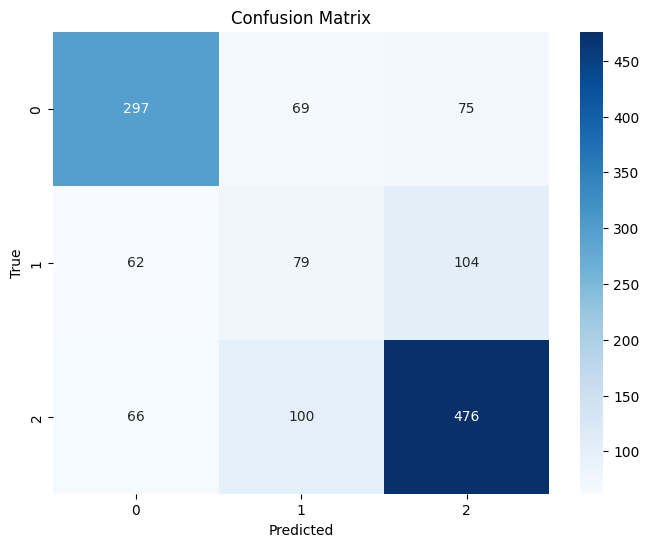

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

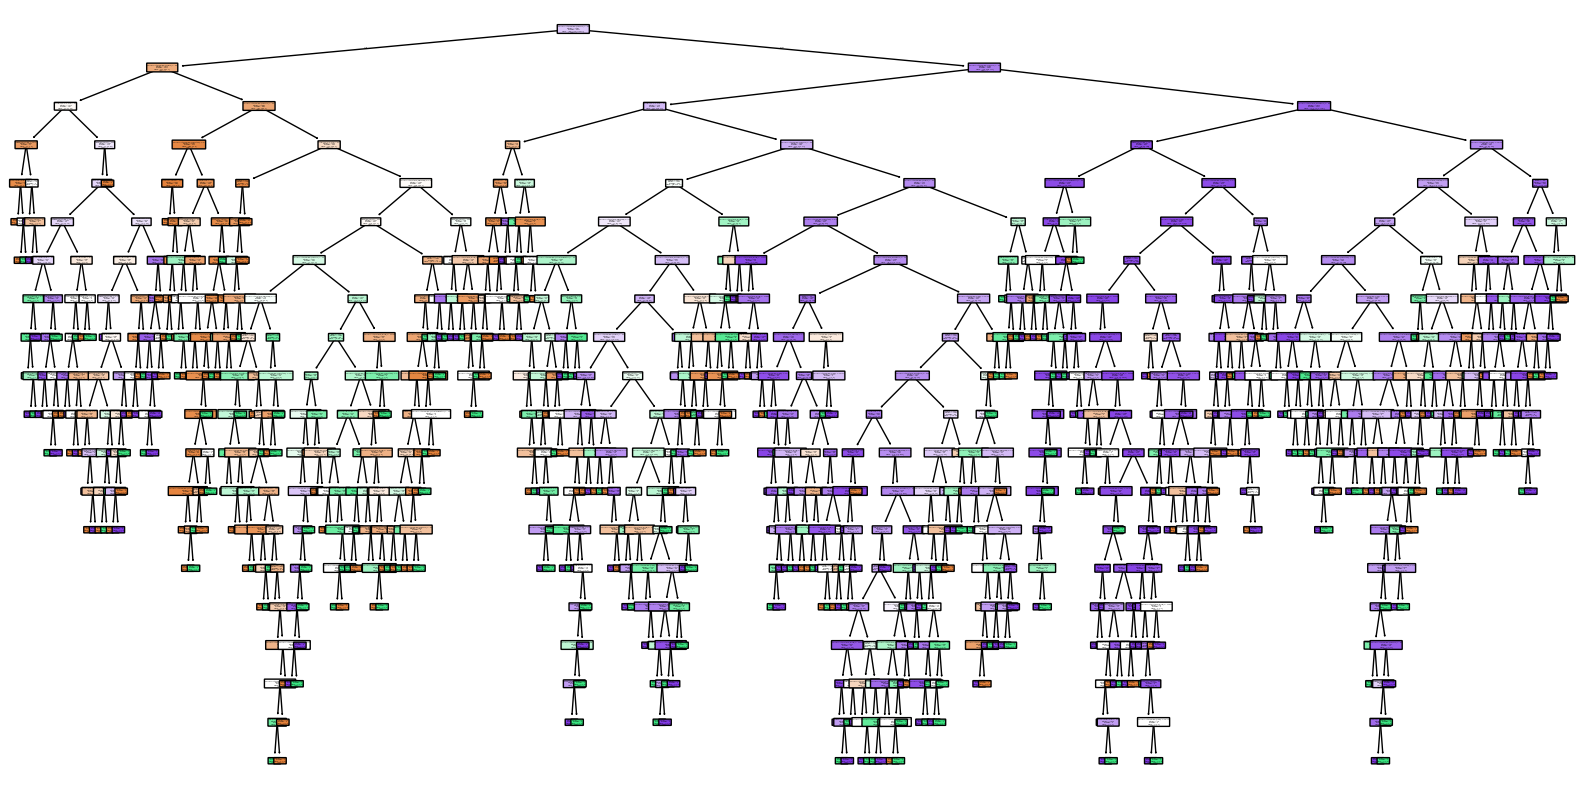

In [ ]:
y_train_series = pd.Series(y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in y_train_series.unique()], rounded=True)
plt.show()

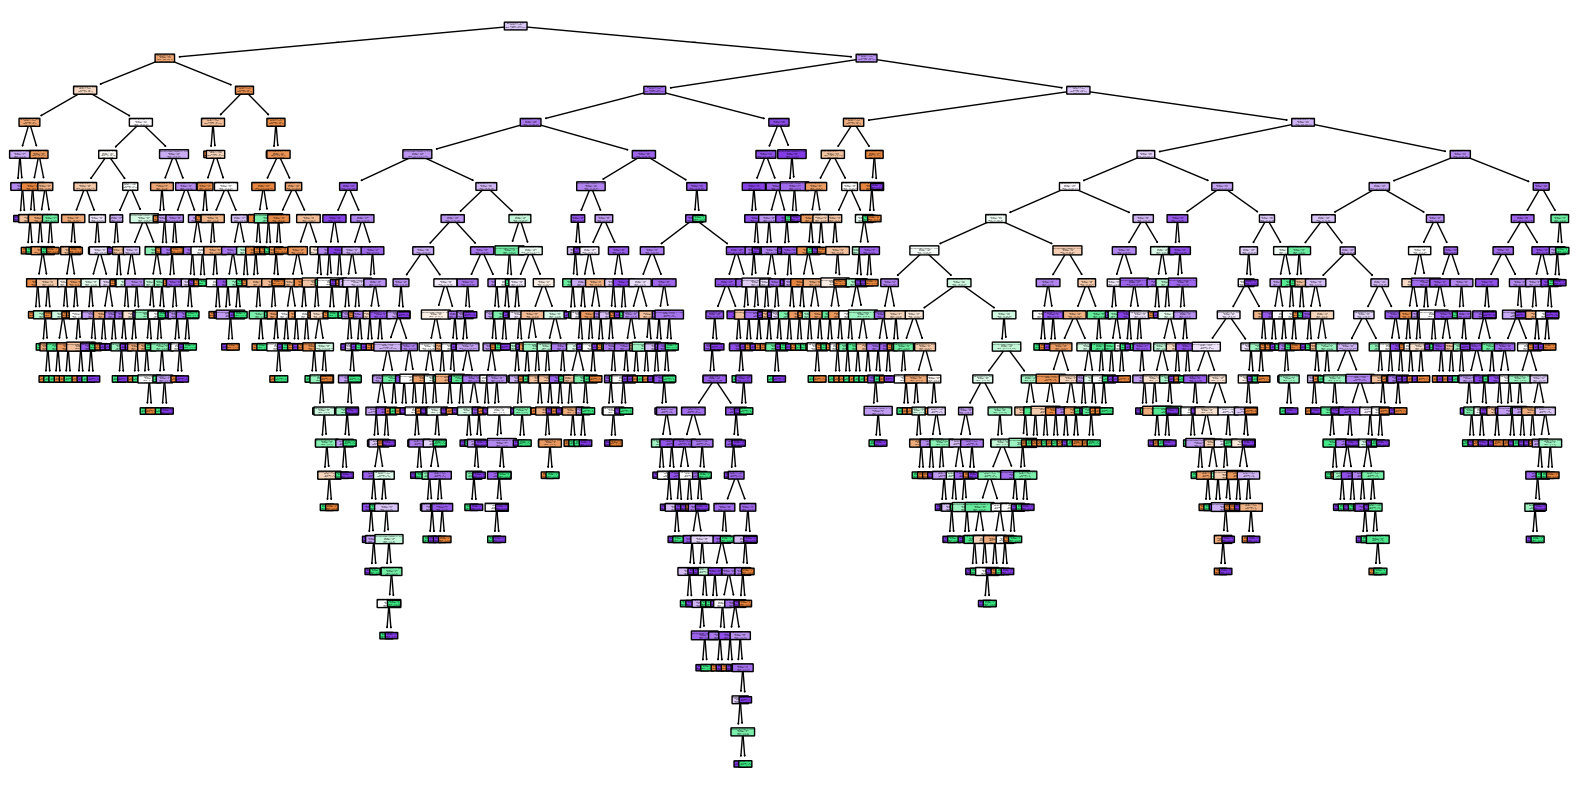

In [ ]:
decision_tree = pipeline.named_steps['log_reg']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in y.unique()], rounded=True)
plt.show()